# **Pregunta 2**

**¿Cúal es la plataforma que tiene mayor variedad de géneros?**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast # para transformar el texto tipo "['xxxx', 'yyyy']" en lista

In [3]:
df_disney_per = pd.read_csv("data/personas_disney.csv")
df_hulu_per = pd.read_csv("data/personas_hulu.csv")
df_max_per = pd.read_csv("data/personas_max.csv")
df_netflix_per = pd.read_csv("data/personas_netflix.csv")
df_paramount_per = pd.read_csv("data/personas_paramount.csv")
df_prime_per = pd.read_csv("data/personas_prime.csv")

In [4]:
print(df_hulu_per['genres'].head())

0    ['Action', 'Adventure', 'Animation']
1    ['Action', 'Adventure', 'Animation']
2    ['Action', 'Adventure', 'Animation']
3    ['Action', 'Adventure', 'Animation']
4    ['Action', 'Adventure', 'Animation']
Name: genres, dtype: object


Ahora Revisaremos cada plataforma para obtener la cantidad de generos distintos que tiene cada una.

In [5]:
df_disney2 = df_disney_per.dropna(subset=['genres']).copy()
df_hulu2 = df_hulu_per.dropna(subset=['genres']).copy()
df_max2 = df_max_per.dropna(subset=['genres']).copy()
df_netflix2 = df_netflix_per.dropna(subset=['genres']).copy()
df_paramount2 = df_paramount_per.dropna(subset=['genres']).copy()
df_prime2 = df_prime_per.dropna(subset=['genres']).copy()

Convertimos la cadena de texto en una lista

In [6]:

df_disney2['genres'] = df_disney2['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_hulu2['genres'] = df_hulu2['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_max2['genres'] = df_max2['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_netflix2['genres'] = df_netflix2['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_paramount2['genres'] = df_paramount2['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_prime2['genres'] = df_prime2['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

Separamos cada género en su propia fila

In [7]:
df_disney_exploded = df_disney2.explode('genres')
df_hulu_exploded = df_hulu2.explode('genres')
df_max_exploded = df_max2.explode('genres')
df_netflix_exploded = df_netflix2.explode('genres')
df_paramount_exploded = df_paramount2.explode('genres')
df_prime_exploded = df_prime2.explode('genres')

Contamos cuántas veces aparece cada género

In [8]:
conteo_disney_generos = df_disney_exploded['genres'].value_counts()
conteo_hulu_generos = df_hulu_exploded['genres'].value_counts()
conteo_max_generos = df_max_exploded['genres'].value_counts()
conteo_netflix_generos = df_netflix_exploded['genres'].value_counts()
conteo_paramount_generos = df_paramount_exploded['genres'].value_counts()
conteo_prime_generos = df_prime_exploded['genres'].value_counts()

Damos nombre al indice donde estaran los generos, y obtenemos la columna con la cantidad de generos

In [9]:
conteo_disney_generos = conteo_disney_generos.rename_axis('Genero').reset_index(name='Cantidad')
conteo_hulu_generos = conteo_hulu_generos.rename_axis('Genero').reset_index(name='Cantidad')
conteo_max_generos = conteo_max_generos.rename_axis('Genero').reset_index(name='Cantidad')
conteo_netflix_generos = conteo_netflix_generos.rename_axis('Genero').reset_index(name='Cantidad')
conteo_paramount_generos = conteo_paramount_generos.rename_axis('Genero').reset_index(name='Cantidad')
conteo_prime_generos = conteo_prime_generos.rename_axis('Genero').reset_index(name='Cantidad')

In [10]:
conteo_hulu_generos

,Genero,Cantidad
0,Drama,10742
1,Comedy,7751
2,Action,5330
3,Thriller,4845
4,Horror,4316
5,Adventure,3534
6,Crime,3488
7,Mystery,2914
8,Romance,2781
9,Sci-Fi,1857


In [11]:
total_generos = conteo_hulu_generos['Genero'].nunique()
print("\nTotal de géneros:", total_generos)


Total de géneros: 23


Creamos el Dataframe para que quede mas ordenada la información y sea mas rapido ver cual es la plataformaa con mayor variedad de genero

In [12]:
generos_vari = {
    'Plataforma': ['Disney+', 'Hulu', 'Max', 'Netflix', 'Paramount+', 'Prime'],
    'Cantidad de géneros': [
        conteo_disney_generos['Genero'].nunique(),
        conteo_hulu_generos['Genero'].nunique(),
        conteo_max_generos['Genero'].nunique(),
        conteo_netflix_generos['Genero'].nunique(),
        conteo_paramount_generos['Genero'].nunique(),
        conteo_prime_generos['Genero'].nunique()
    ]
}

df_generos_vari = pd.DataFrame(generos_vari)

In [13]:
df_generos_vari

,Plataforma,Cantidad de géneros
0,Disney+,22
1,Hulu,23
2,Max,24
3,Netflix,25
4,Paramount+,21
5,Prime,24


Vemos el DataFrame de la cantidad de generos por cada plataforma

Ahora representaremos la información como un grafico de barras, para mayor claridad

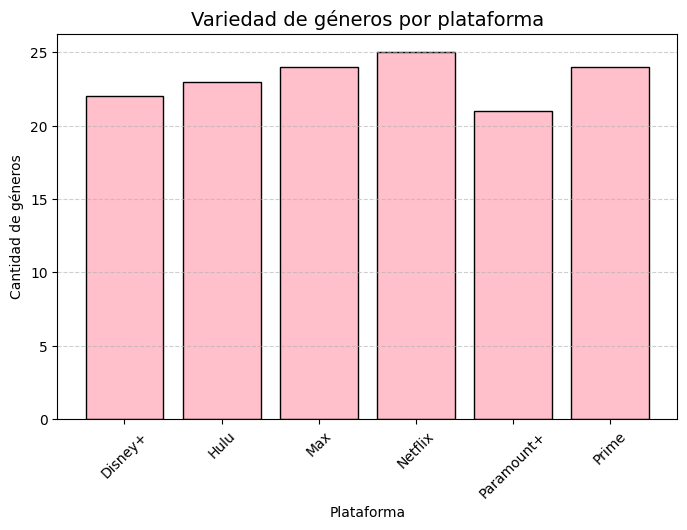

In [15]:
plt.figure(figsize=(8,5))
plt.bar(df_generos_vari['Plataforma'], df_generos_vari['Cantidad de géneros'], color='pink', edgecolor='black')

plt.title('Variedad de géneros por plataforma', fontsize=14)
plt.xlabel('Plataforma')
plt.ylabel('Cantidad de géneros')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Por lo tanto la plataforma con mayor variedad de genero es **Netflix**.